# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
%store -r x_train x_val x_test y_train y_val y_test

In [3]:
def calc_mse(x,y,b):
    """Returns the MSE given the predicted and expected outputs"""  
    y_pred = predict(x,b)
    sqrd = np.square(y_pred - y)
    sumd = sqrd.sum()
    mse = (1 / (len(y_pred))) * sumd
    
    return mse

def predict(x,b):
    """outputs the prediction from x given the parameter array b"""
    x = np.concatenate((np.ones([len(x),1]),x),axis=1)
    ret =  np.einsum('mn,n -> m', x, b)
    return ret

def calc_grad(x,y,b):
    m = y.shape[0]
    diff = (predict(x,b) - y) 
    x = np.concatenate((np.ones([len(x),1]),x),axis=1)
    prodsum = np.einsum('mn,m -> n', x, diff)
    grad = prodsum / m
    return grad

def r_2(x,y,b):
    sey = sum(np.square(y-y.mean()))
    ser = sum(np.square(y-predict(x,b)))
    ret = 1 - (ser/sey)
    return ret

In [4]:
def iterate(x, y, b, e, a, conv_thresh = 1e-8): 
    
    converged = False

    while True:
        
        # determine gradients
        grads = calc_grad(x,y,b)

        #step in direction of the gradient to get the new parameters
        b_new = b - grads * a
        
        # determine new error
        e_new = calc_mse(x,y,b_new)

        # check if error is reducing, reduce the step size if not
        if e_new > e:
            a = a/10 
        else:
            break
        
    # reset a for speed
    a = 1
    
    # check for convergence and terminate if converged
    if abs(e_new - e) < conv_thresh:
        converged = True
        
    # Take the step
    b = b_new
    e = e_new
    
    return b, e, a, converged

In [5]:
num_iterations = 1000 #20
b = np.array([0.5])
a = 1
x = x_train
y = y_train.to_numpy()
e = calc_mse(x,y,b)
cost = [e]

In [6]:
%%time
for i in range(num_iterations):
    
    b, e, a, converged = iterate(x, y, b, e, a)
    
    cost.append(e) ## for plot
    #print(f"iteration # {i+1}\nb={b}\na={a}\ne={e}\n\n")
    
    if converged:
        # Break out of iteration loop..
        print('Converged!')
        break
        
# fig = plt.figure(figsize=[10,10])  
# plt.plot(np.arange(len(cost)),cost)   
# plt.xlabel('Iteration')
# plt.ylabel('Error')
# plt.show()

Converged!
Wall time: 2.84 s


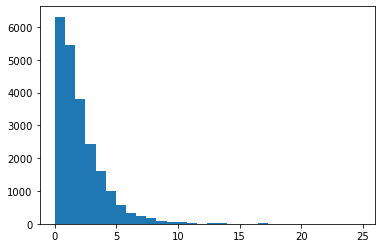

In [7]:
#absolute error
plt.hist(abs(y-predict(x,b)),bins=30)
plt.show()

## Test Data

In [8]:
#train

%time y_train_pred = predict(x_train,b)

y_train_pred[y_train_pred<0]=0
ae_tr = abs(y_train - y_train_pred)
mae_tr = ae_tr.mean()
mse_tr = (np.square(ae_tr).sum())/y_train_pred.shape[0]
rmse_tr = np.sqrt(mse_tr)

sey_tr = sum(np.square(y_train-y_train.mean()))
ser_tr = sum(np.square(y_train-y_train_pred))
r2_tr = 1 - (ser_tr/sey_tr)

#test
y_test_pred = predict(x_test,b)
y_test_pred[y_test_pred<0]=0
ae = abs(y_test_pred - y_test)
mae = ae.mean()
mse = (np.square(ae).sum())/y_test_pred.shape[0]
rmse = np.sqrt(mse)

sey = sum(np.square(y_test-y_test.mean()))
ser = sum(np.square(y_test-y_test_pred))
r2 = 1 - (ser/sey)

#val
y_val_pred = predict(x_val,b)
y_val_pred[y_val_pred<0]=0
ae_val = abs(y_val_pred - y_val)
mae_val = ae_val.mean()
mse_val = (np.square(ae_val).sum())/y_val_pred.shape[0]
rmse_val = np.sqrt(mse_val)

print(f'Training results:\nrmse={rmse_tr:.03f}\nmae={mae_tr:.04f}\nr2={r2_tr:.04f}\n')
print(f'Test results:\nrmse={rmse:.03f}\nmae={mae:.04f}\nr2={r2:.04f}\n')
print(f'Validation results:\nrmse={rmse_val:.03f}\nmae={mae_val:.04f}')

Wall time: 2 ms
Training results:
rmse=2.839
mae=2.0298
r2=0.3907

Test results:
rmse=2.856
mae=2.0389
r2=0.4199

Validation results:
rmse=2.896
mae=2.0498


In [9]:
lin_maes = ae
lin_rel = ae/y_test
%store lin_maes lin_rel

Stored 'lin_maes' (Series)
Stored 'lin_rel' (Series)


# Toy Problem

In [10]:
x_toy = np.random.random(size=[2000,2])*2 - 1

$y = 4 - 3 x_1 + 0.5 x_2 $

In [11]:
def toy_func(x):
    return 4 + 0.5*x[:,1] - 3*x[:,0]

y_toy = toy_func(x_toy)

In [12]:
x_toy_train = x_toy[:1600]
x_toy_test = x_toy[1600:]

y_toy_train = y_toy[:1600]
y_toy_test = y_toy[1600:]

In [13]:
num_iterations = 1000
b_toy = np.array([0.5])
a_toy = 1
e_toy = calc_mse(x_toy_train,y_toy_train,b_toy)

for i in range(num_iterations):
    
    b_toy, e_toy, a_toy, converged = iterate(x_toy_train, y_toy_train, b_toy, e_toy, a_toy)
    
    if converged:
        # Break out of iteration loop..
        print('Converged!')
        break

Converged!


In [14]:
b_toy

array([ 3.99999484, -2.99988524,  0.49996228])

In [15]:
y_pred_toy = predict(x_toy_test,b_toy)

ae_toy = abs(y_pred_toy - y_toy_test)
mae_toy = ae_toy.mean()
mse_toy = (np.square(ae_toy).sum())/y_pred_toy.shape[0]
rmse_toy = np.sqrt(mse_toy)

In [16]:
print(f"RMSE for the toy problem = {rmse_toy:.04f}")

RMSE for the toy problem = 0.0001


In [17]:
%store x_toy_train y_toy_train x_toy_test y_toy_test

Stored 'x_toy_train' (ndarray)
Stored 'y_toy_train' (ndarray)
Stored 'x_toy_test' (ndarray)
Stored 'y_toy_test' (ndarray)


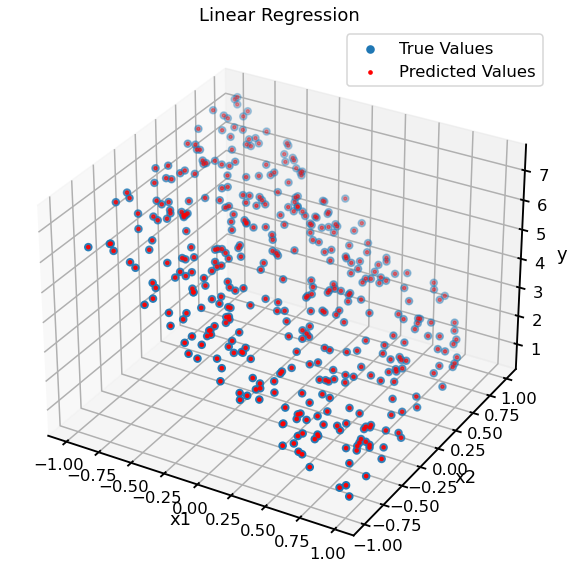

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_context("talk")
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_toy_test[:,0], x_toy_test[:,1], y_toy_test, s=50,label='True Values')
ax.scatter(x_toy_test[:,0], x_toy_test[:,1], y_pred_toy, color='r',s=10,label='Predicted Values')
plt.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.set_title("Linear Regression")
plt.savefig("figures\\regtoy.png")
plt.show()